<a href="https://colab.research.google.com/github/jhgf9999/PUBG_Game_Analysis/blob/main/PUBG_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Databricks read_csv

In [ ]:
#Databricks read_csv code
agg = 'file:///databricks/driver/agg_match_stats_4.csv.1'
kill = 'file:///databricks/driver/kill_match_stats_final_4.csv'
agg_df = pd.read_csv(agg)  # shape (13849287, 15)
kill_df = pd.read_csv(kill) # shape(13426348, 12)

# Google Colab read_csv

In [ ]:
#For Google Colab read_csv code
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
agg_df = pd.read_csv("agg_match_stats_4.csv")
kill_df = pd.read_csv("kill_match_stats_final_4.csv")
display(agg_df.head(1))
display(kill_df.head(1))

,date,game_size,match_id,match_mode,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_name,player_survive_time,team_id,team_placement
0,2017-10-31T02:41:53+0000,95,2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...,tpp,1.0,0.0,0.0,0.0,37.919838,20.0,0.0,m3xdave,106.351,100000.0,88.0


,killed_by,killer_name,killer_placement,killer_position_x,killer_position_y,map,match_id,time,victim_name,victim_placement,victim_position_x,victim_position_y
0,M249,0932313woaini,7.0,529007.7,440035.5,MIRAMAR,2U4GBNA0YmkBbLEF24GGKLLAPoDQjAD8DoJFecsw9jUiNE...,1209,GODusopp,11.0,526111.8,432951.8


# Data Overview and data cleansing

In [ ]:
agg_df.describe() #Basic overview

,game_size,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_survive_time,team_id,team_placement
count,214575.000000,214574.000000,214574.000000,214574.000000,214574.000000,214574.000000,214574.000000,214574.000000,214574.000000,214574.000000,214574.000000
mean,48.344984,2.681536,0.226640,0.568051,1142.935757,1277.935158,123.633343,0.887153,784.953605,22642.783021,25.078048
std,25.826387,1.255825,0.572539,1.091661,1972.068281,3911.605882,167.266679,1.538789,576.483297,41847.710313,20.863682
min,13.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.374000,1.000000,1.000000
25%,27.000000,2.000000,0.000000,0.000000,0.000000,207.500096,0.000000,0.000000,245.764500,11.000000,10.000000
50%,45.000000,2.000000,0.000000,0.000000,0.000000,842.281279,77.000000,0.000000,648.169000,22.000000,20.000000
75%,50.000000,4.000000,0.000000,1.000000,1863.061647,2060.772717,175.000000,1.000000,1297.172250,47.000000,34.000000
max,100.000000,4.000000,8.000000,39.000000,197272.453000,959825.200000,4784.000000,46.000000,2230.418000,100112.000000,100.000000


In [ ]:
agg_df.isnull().sum() #To check null values in each column

date                     0
game_size                0
match_id                 0
match_mode               1
party_size               1
player_assists           1
player_dbno              1
player_dist_ride         1
player_dist_walk         1
player_dmg               1
player_kills             1
player_name            320
player_survive_time      1
team_id                  1
team_placement           1
dtype: int64

In [ ]:
kill_df.isnull().sum() #To check null values in each column

killed_by               0
killer_name          5362
killer_placement     5362
killer_position_x    5362
killer_position_y    5362
map                   932
match_id                0
time                    0
victim_name             1
victim_placement     1243
victim_position_x       1
victim_position_y       1
dtype: int64

In [ ]:
agg_df2= agg_df.dropna(axis = 0, how = 'any') #drop any rows with NA's
kill_df2 = kill_df.dropna(axis = 0, how = 'any') #drop any rows with NA's
display(agg_df2.isnull().sum())
display(kill_df2.isnull().sum())

date                   0
game_size              0
match_id               0
match_mode             0
party_size             0
player_assists         0
player_dbno            0
player_dist_ride       0
player_dist_walk       0
player_dmg             0
player_kills           0
player_name            0
player_survive_time    0
team_id                0
team_placement         0
dtype: int64

killed_by            0
killer_name          0
killer_placement     0
killer_position_x    0
killer_position_y    0
map                  0
match_id             0
time                 0
victim_name          0
victim_placement     0
victim_position_x    0
victim_position_y    0
dtype: int64

# Descriptive Analysis

Down and Out                       16179
M416                               12898
SCAR-L                             10406
M16A4                               9988
AKM                                 9517
UMP9                                6152
S1897                               4618
Mini 14                             3261
Kar98k                              2838
Punch                               2802
S686                                2779
SKS                                 2664
S12K                                2413
Micro UZI                           2190
Grenade                             1913
Tommy Gun                           1478
P92                                 1265
P1911                               1237
Hit by Car                          1024
Vector                               672
Bluezone                             567
Falling                              490
DP-28                                342
Uaz                                  333
Groza           

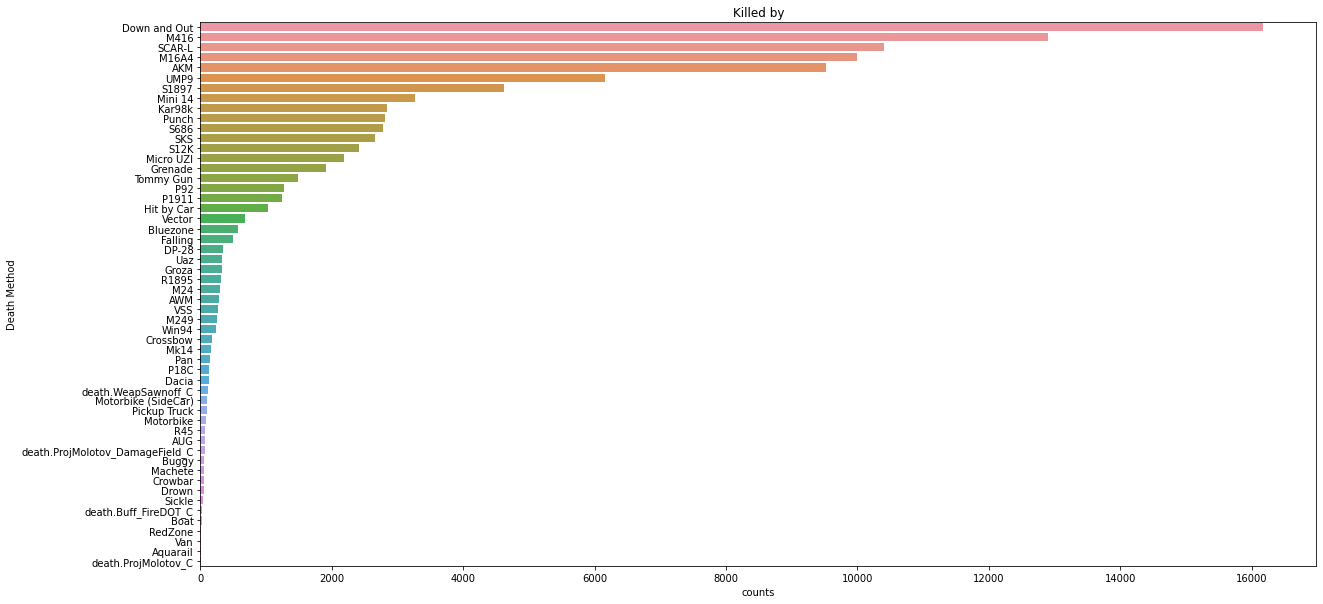

In [ ]:
kill_all = kill_df2['killed_by'].value_counts()
print(kill_all) #Get rid of the first one, and show top 10 weapons

fig = plt.figure(figsize = (20,10))
ax = sns.barplot(x = kill_all.values, y = kill_all.index)
ax.set_xlabel('counts')
ax.set_ylabel('Death Method')
ax.set_title('Killed by')
plt.show()

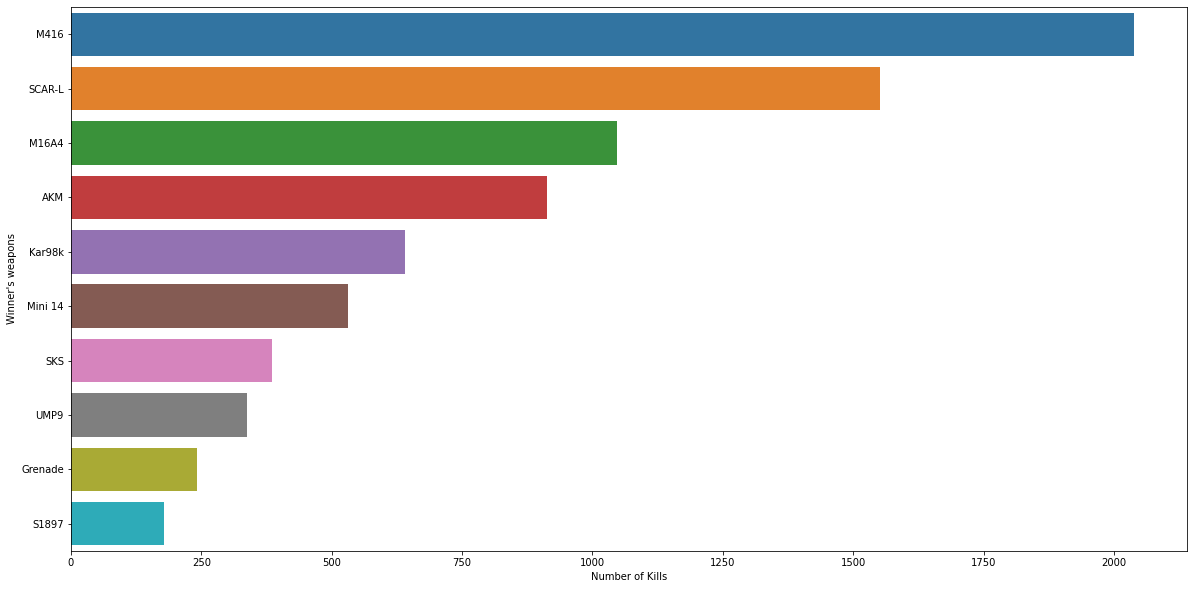

In [ ]:
#Top 10 winner's weapons
weapon_list = kill_all.drop(['Down and Out', 'Punch', 'Hit by Car', 
                             'Falling', 'Bluezone', 'RedZone', 
                             'Motorbike (SideCar)', 'Dacia', 'Pickup Truck', 
                             'Buggy', 'Boat', 'Aquarail'])
weapon_kill = kill_df2[kill_df2['killed_by'].isin(list(weapon_list.index))]
winner_weapons = weapon_kill[weapon_kill['killer_placement'] == 1.0]['killed_by'].value_counts()

fig = plt.figure(figsize = (20, 10))
ax = sns.barplot(x = winner_weapons[:10].values, y = winner_weapons[:10].index)
ax.set_ylabel('Winner\'s weapons')
ax.set_xlabel('Number of Kills')
plt.show()

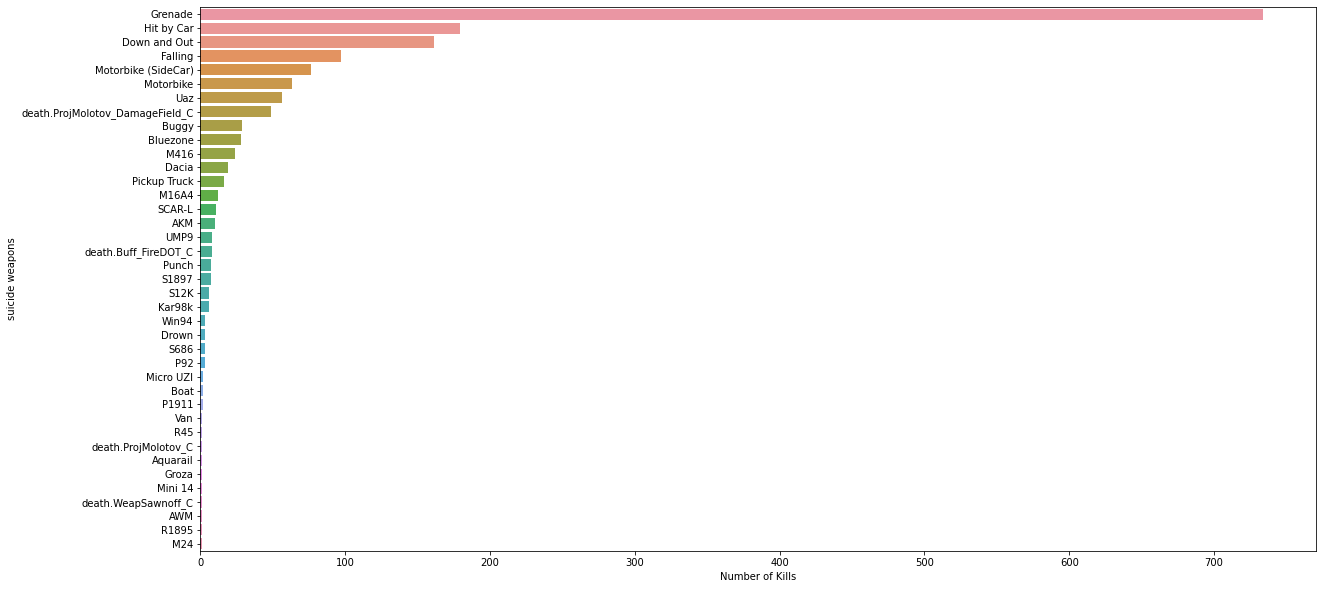

In [ ]:
#fun fact
suicide_weapons = kill_df2[kill_df2['killer_name'] == kill_df2['victim_name']]['killed_by'].value_counts()

fig = plt.figure(figsize = (20, 10))
ax = sns.barplot(x = suicide_weapons[:10].values, y = suicide_weapons[:10].index)
ax.set_ylabel('suicide weapons')
ax.set_xlabel('Number of Kills')
plt.show()

#Stay away from the grenade you just threw!!!

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


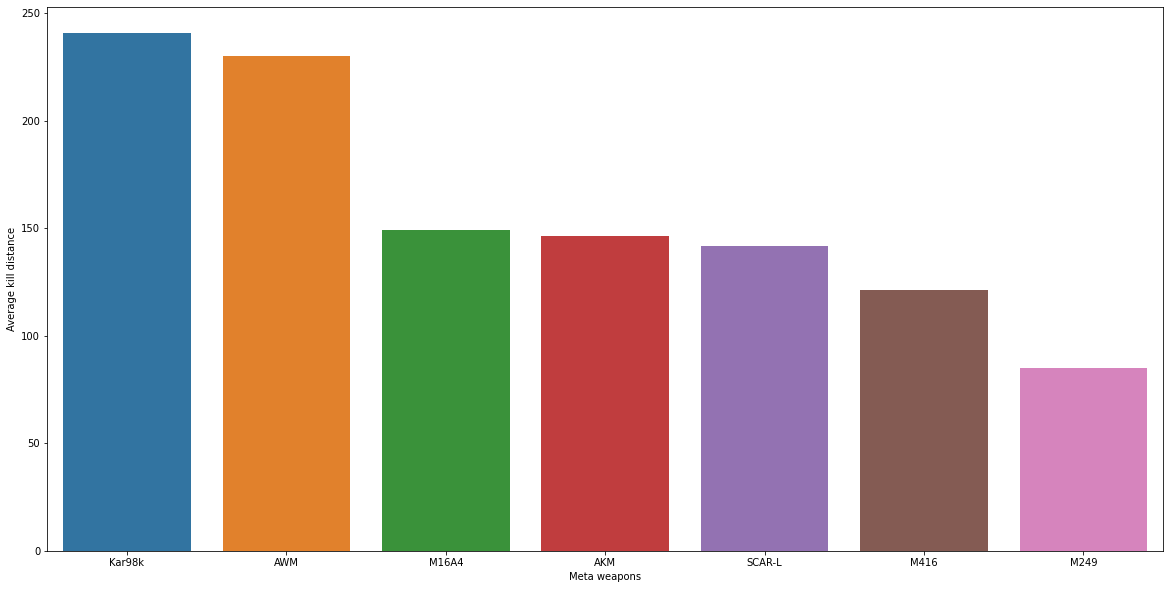

In [ ]:
#Meta武器平均擊殺距離
kill_df2.head()

dist = np.sqrt(((kill_df2['killer_position_x'] - kill_df2['victim_position_x'])/100) ** 2 + ((kill_df2['killer_position_y'] - kill_df2['victim_position_y'])/100) ** 2)
dist = dist.apply(lambda x: int(x))
kill_df2.loc[:, 'distance'] = dist.values

weapon_mean_kill_dist = kill_df2.groupby('killed_by')['distance'].mean()
meta_weapon = ['M16A4', 'M416', 'Kar98k', 'AKM', 'SCAR-L', 'M249', 'AWM']
meta_weapon_mean_dist = weapon_mean_kill_dist[meta_weapon].sort_values(ascending = False)

fig = plt.figure(figsize = (20, 10))
ax = sns.barplot(y = meta_weapon_mean_dist.values, x = meta_weapon_mean_dist.index)
ax.set_ylabel('Average kill distance')
ax.set_xlabel('Meta weapons')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#killing distribution
agg_sub_df = agg_df[:1000000]
kill_sub_df = kill_df[:1000000]
agg_sub_deleted = agg_sub_df.dropna(axis=0)
kill_sub_deleted = kill_sub_df.dropna(axis=0)
agg_sub_deleted['player_kills'].describe()
#relationship between killing and team placement
import seaborn as sns
data = agg_sub_deleted[['player_kills', 'team_placement']]
sns.set(style="darkgrid")
g = sns.relplot(x="player_kills", y="team_placement",height=4,linewidth=2,aspect=1.3, kind="line", data=data)
g.fig.autofmt_xdate() # Rotate coordinates

# Create SQL Schema 

In [ ]:
%python
from pyspark.sql.types import *
agg_Schema = StructType([StructField("date", DateType(), True),
                         StructField("game_size", IntegerType(), True),
                         StructField("match_id", StringType(), True),
                         StructField("match_mode", StringType(), True),
                         StructField("party_size", IntegerType(), True),
                         StructField("player_assists", IntegerType(), True),
                         StructField("player_dbno", IntegerType(), True),
                         StructField("player_dist_ride", DoubleType(), True),
                         StructField("player_dist_walk", DoubleType(), True),
                         StructField("player_dmg", IntegerType(), True),
                         StructField("player_kills", IntegerType(), True),
                         StructField("player_name", StringType(), True),
                         StructField("player_survive_time", DoubleType(), True),
                         StructField("team_id", IntegerType(), True),
                         StructField("team_placement", IntegerType(), True)])

agg_DF_withSchema = spark.read.format('csv').schema(agg_Schema).option("header", "true").option("sep",",").load('file:///databricks/driver/agg_match_stats_4.csv')

agg_DF_withSchema.show(5)
agg_DF_withSchema.printSchema()

kill_Schema = StructType([StructField("killed_by", StringType(), True),
                          StructField("killer_name", StringType(), True),
                          StructField("killer_placement", DoubleType(), True),
                          StructField("killer_position_x", DoubleType(), True),
                          StructField("killer_position_y", DoubleType(), True),
                          StructField("map", StringType(), True),
                          StructField("match_id", StringType(), True),
                          StructField("time", IntegerType(), True),
                          StructField("victim_name", StringType(), True),
                          StructField("victim_placement", DoubleType(), True),
                          StructField("victim_position_x", DoubleType(), True),
                          StructField("victim_position_y", DoubleType(), True)])

kill_DF_withSchema = spark.read.format('csv').schema(kill_Schema).option("header", "true").option("sep", ",").load('file:///databricks/driver/kill_match_stats_final_4.csv')

kill_DF_withSchema.show(5)

# SQL Queries

In [ ]:
#Top 10 winner's weapons
from pyspark.sql.functions import col,column
kill_DF_withSchema.createOrReplaceTempView("kill_DF")
sqlDF = spark.sql("SELECT killed_by AS Weapon, COUNT(*) AS Number_of_usage FROM (SELECT * FROM kill_DF WHERE killer_placement = 1.0) GROUP BY killed_by HAVING  killed_by <> 'Down and Out' ORDER BY 2 DESC LIMIT 10")
sqlDF.show()

In [ ]:
#最常自殺的武器
sqlDF2 = spark.sql("SELECT killed_by AS Weapon, COUNT(*) AS count FROM (SELECT * FROM kill_DF WHERE killer_name = victim_name) GROUP BY killed_by HAVING killed_by <> 'Down and Out' ORDER BY 2 DESC ")
sqlDF2.show()

# Death Map

In [ ]:
pip install Pillow
%sh
wget https://budt758b-041055024398.s3.amazonaws.com/erangel.jpg #get erangel map

In [ ]:
pip install Pillow
import matplotlib.image as mpimg
bg =mpimg.imread("erangel.jpg")
#killer and victim position
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
edf = kill_sub_df.loc[kill_sub_df['map'] == 'ERANGEL']
def killer_victim_df_maker(df):
    #挑出被擊殺玩家座標
    df = edf
    victim_x_df = df.filter(regex = 'victim_position_x')
    victim_y_df = df.filter(regex = 'victim_position_y')
    killer_x_df = df.filter(regex = 'killer_position_x')
    killer_y_df = df.filter(regex = 'killer_position_y')
    #ravel()將多維矩陣便一維
    victim_x_s = pd.Series(victim_x_df.values.ravel('F'))
    victim_y_s = pd.Series(victim_y_df.values.ravel('F'))
    killer_x_s = pd.Series(killer_x_df.values.ravel('F'))
    killer_y_s = pd.Series(killer_y_df.values.ravel('F'))
    
    vdata = {'x':victim_x_s, 'y':victim_y_s}
    kdata = {'x':killer_x_s, 'y':killer_y_s}
    
    #dropna(how = 'any')刪除NA
    #去掉異常數據
    victim_df = pd.DataFrame(data = vdata).dropna(how = 'any')
    victim_df = victim_df[victim_df['x'] > 0]
    killer_df = pd.DataFrame(data = kdata).dropna(how = 'any')
    killer_df = killer_df[killer_df['x'] > 0]
    return killer_df, victim_df

ekdf,evdf = killer_victim_df_maker(edf)

In [ ]:
#start to plot
from scipy.ndimage.filters import gaussian_filter
import matplotlib.cm as cm
from matplotlib.colors import Normalize
plot_data_ev = evdf[['x','y']].values
plot_data_ek = ekdf[['x','y']].values
#match with the map
plot_data_ev = plot_data_ev * 4040 /800000
plot_data_ek = plot_data_ek * 4040 /800000
def heatmap(x, y, s, bins = 100):
#    x = plot_data_ev[:,0]
#    y = plot_data_ev[:,1]
#    s = 1.5
#    bins = 800
    #np.histogram2d()將兩列數值轉成矩陣
    heatmap, xedges, yedges = np.histogram2d(x, y, bins = bins)
    #銳化模糊影像
    heatmap = gaussian_filter(heatmap, sigma = s)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent
hmap, extent = heatmap(plot_data_ev[:,0], plot_data_ev[:,1], 1.5, bins =800)
alphas = np.clip(Normalize(0, hmap.max()/100, clip=True)(hmap)*1.5,0.0,1.)
colors = Normalize(hmap.max()/100, hmap.max()/20, clip=True)(hmap)
colors = cm.bwr(colors)
colors[..., -1] = alphas

fig, ax = plt.subplots(figsize = (24,24))
ax.set_xlim(0, 4096);ax.set_ylim(0, 4096)
ax.imshow(bg)
ax.imshow(colors, extent = extent, origin = 'lower', cmap = cm.bwr, alpha = 1)
#ax.imshow(colors2, extent = extent2, origin = 'lower', cmap = cm.RdBu, alpha = 0.5)
plt.gca().invert_yaxis()
plt.title('Erangel Death Map')

# Predictive analysis: KNN

## Deciding target instances

In [ ]:
conditions = [agg_df2['team_placement'] <= 10.0, agg_df2['team_placement'] > 10.0]
choices = [1, 0]
agg_df2['top10'] = np.select(conditions, choices)
agg_df2.head(5)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,game_size,match_id,match_mode,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_name,player_survive_time,team_id,team_placement,top10
0,2017-10-31T02:41:53+0000,95,2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...,tpp,1.0,0.0,0.0,0.000000,37.919838,20.0,0.0,m3xdave,106.351,100000.0,88.0,0
1,2017-10-31T02:41:53+0000,95,2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...,tpp,1.0,0.0,0.0,292.205048,3457.036130,387.0,3.0,UDaddyHere,1690.021,100006.0,8.0,1
2,2017-10-31T02:41:53+0000,95,2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...,tpp,1.0,0.0,0.0,0.000000,106.215900,0.0,0.0,Dummy05,103.415,100010.0,89.0,0
3,2017-10-31T02:41:53+0000,95,2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...,tpp,1.0,0.0,0.0,0.000000,126.959831,91.0,0.0,NA-Wuyifan,272.838,100019.0,67.0,0
4,2017-10-31T02:41:53+0000,95,2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...,tpp,1.0,0.0,0.0,0.000000,43.346710,0.0,0.0,kickinchicken,134.342,100024.0,81.0,0


## Selecting features

In [ ]:
X = agg_df2.iloc[:, [5,6,7,8,9,10]].values #-4
y = agg_df2.iloc[:, -1].values

In [ ]:
print(X)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 3.79198380e+01
  2.00000000e+01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.92205048e+02 3.45703613e+03
  3.87000000e+02 3.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.06215900e+02
  0.00000000e+00 0.00000000e+00]
 ...
 [1.00000000e+00 0.00000000e+00 1.69322546e+03 2.93380835e+03
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 2.00000000e+00 1.18417517e+03 2.60640747e+03
  2.39000000e+02 2.00000000e+00]
 [0.00000000e+00 0.00000000e+00 6.75967346e+02 3.16533813e+03
  1.80000000e+01 0.00000000e+00]]


In [ ]:
print(y)

[0 1 0 ... 1 1 1]


## Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
print(X_train)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 6.72337400e+01
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 7.17555500e+02 2.11638818e+03
  1.49000000e+02 1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.83508087e+02
  2.00000000e+01 0.00000000e+00]
 ...
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 1.33620117e+02
  7.20000000e+01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.17448535e+03 3.04825700e+03
  2.02000000e+02 2.00000000e+00]
 [0.00000000e+00 1.00000000e+00 1.63228760e+03 3.30091187e+03
  1.72000000e+02 0.00000000e+00]]


In [ ]:
print(y_train)

[0 1 0 ... 0 1 1]


In [ ]:
print(X_test)

[[0.00000000e+00 0.00000000e+00 4.30433350e+03 1.34028162e+03
  2.00000000e+00 0.00000000e+00]
 [2.00000000e+00 0.00000000e+00 1.61285864e+03 2.07594946e+03
  1.87000000e+02 0.00000000e+00]
 [0.00000000e+00 2.00000000e+00 0.00000000e+00 3.59819763e+02
  4.72000000e+02 5.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 2.36610300e+03 2.29462200e+03
  5.24000000e+02 5.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 1.05090675e+02
  1.79000000e+02 1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 3.53280469e+03
  1.00000000e+02 1.00000000e+00]]


In [ ]:
print(y_test)

[0 1 0 ... 0 0 0]


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

[[-0.3969618  -0.51777668 -0.56902206 -0.27436483 -0.73741224 -0.57543899]
 [-0.3969618   0.39355062 -0.21303131  0.18741579  0.1509556   0.07198221]
 [-0.3969618  -0.51777668 -0.56902206 -0.2481622  -0.61816823 -0.57543899]
 ...
 [-0.3969618   0.39355062 -0.56902206 -0.25940454 -0.30813382 -0.57543899]
 [-0.3969618  -0.51777668  1.50200684  0.3974141   0.46695221  0.71940342]
 [-0.3969618   0.39355062  0.24078191  0.45435032  0.2880862  -0.57543899]]


In [ ]:
print(X_test)

[[-0.3969618  -0.51777668  1.56642658  0.01251879 -0.72548784 -0.57543899]
 [ 3.09465374 -0.51777668  0.23114289  0.17830285  0.37751921 -0.57543899]
 [-0.3969618   1.30487793 -0.56902206 -0.20843004  2.07674627  2.66166704]
 ...
 [-0.3969618  -0.51777668  0.60483945  0.2275811   2.38678069  2.66166704]
 [ 1.34884597 -0.51777668 -0.56902206 -0.2658337   0.3298216   0.07198221]
 [-0.3969618  -0.51777668 -0.56902206  0.50660779 -0.14119221  0.07198221]]


## KNN Training

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[43908  3432]
 [ 6288 10649]]


0.8487795012212767